In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


**Load & Explore Dataset**

In [ ]:
# Load the newly uploaded dataset

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/bestSelling_games.xlsx')
df.head()


,game_name,reviews_like_rate,all_reviews_number,release_date,developer,user_defined_tags,supported_os,supported_languages,price,other_features,age_restriction,rating,difficulty,length,estimated_downloads
0,Counter-Strike 2,86,8803754,"21 Aug, 2012",Valve,"FPS, Action, Tactical","win, linux","English, Czech, Danish, Dutch, Finnish, French...",0.00,"Cross-Platform Multiplayer, Steam Trading Card...",17,3.20,4,80,306170000
1,PUBG: BATTLEGROUNDS,59,2554482,"21 Dec, 2017",PUBG Corporation,"Survival, Shooter, Action, Tactical",win,"English, Korean, Simplified Chinese, French, G...",0.00,"Online PvP, Stats, Remote Play on Phone, Remot...",13,3.10,4,73,162350000
2,ELDEN RING NIGHTREIGN,77,53426,"30 May, 2025","FromSoftware, Inc.","Souls-like, Open World, Fantasy, RPG",win,"English, Japanese, French, Italian, German, Sp...",25.99,"Single-player, Online Co-op, Steam Achievement...",17,3.96,4,50,840000
3,The Last of Usâ„¢ Part I,79,45424,"28 Mar, 2023",Naughty Dog LLC,"Story Rich, Shooter, Survival, Horror",win,"English, Italian, Spanish - Spain, Czech, Dutc...",59.99,"Single-player, Steam Achievements, Steam Tradi...",17,4.10,3,24,2000000
4,Red Dead Redemption 2,92,672140,"5 Dec, 2019",Rockstar Games,"Open World, Story Rich, Adventure, Realistic, ...",win,"English, French, Italian, German, Spanish - Sp...",59.99,"Single-player, Online PvP, Online Co-op, Steam...",17,4.32,3,80,21610000


 Data Cleaning & Feature Engineering


In [ ]:

df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year
df['revenue'] = df['price'] * df['estimated_downloads']
df['primary_genre'] = df['user_defined_tags'].astype(str).str.split(',').str[0].str.strip()

Exploratory Data Analysis (EDA)


/tmp/ipython-input-520879184.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


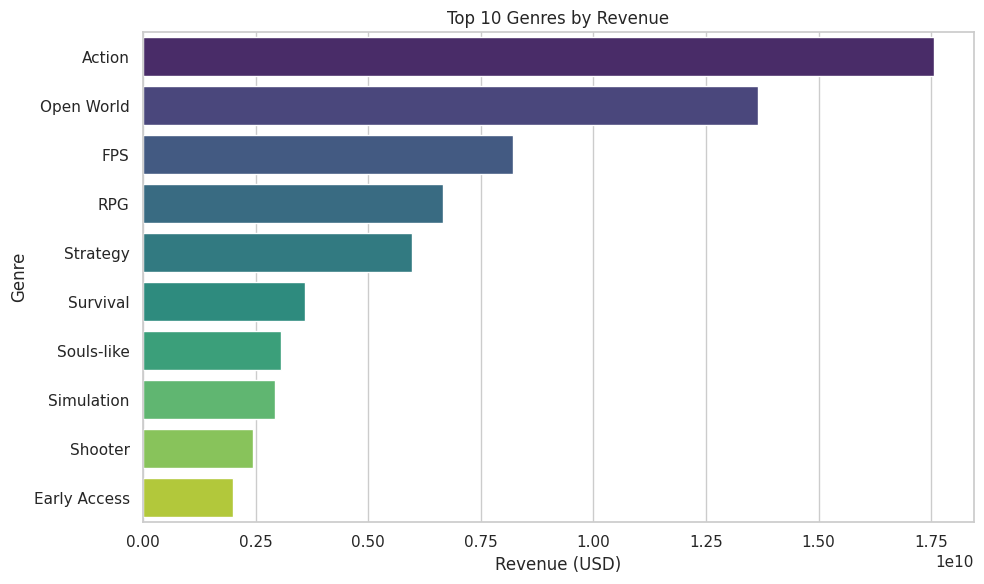

In [ ]:
# Set style
sns.set(style="whitegrid")

# Top Genres by Revenue
plt.figure(figsize=(10, 6))
top_genres = df.groupby('primary_genre')['revenue'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title("Top 10 Genres by Revenue")
plt.xlabel("Revenue (USD)")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


* **Interpretation: Top Genres by Revenue**

Action and Open World games dominate revenue, significantly outperforming all other genres. This suggests that high-paced, exploration-heavy titles have the strongest commercial appeal on Steam.

- FPS (First-Person Shooter) and RPG (Role-Playing Games) also generate strong revenue, indicating sustained demand for immersive, gameplay-heavy experiences.

- Strategy games round out the top 5, showing their niche yet profitable market, often driven by dedicated fanbases.

- Survival, Souls-like, and Simulation games fall into a middle tier — they likely have loyal followings but appeal to narrower audiences.

- Shooter and Early Access titles generate the least among the top 10, which may reflect incomplete development cycles (in the case of Early Access) or market saturation in shooter categories

/tmp/ipython-input-2036153245.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_developers.values, y=top_developers.index, palette='magma')


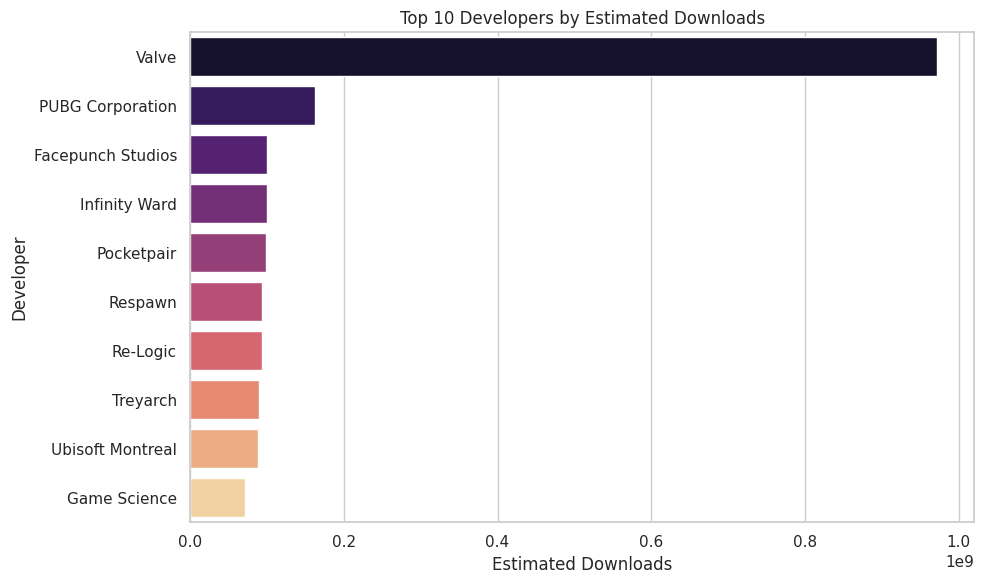

In [ ]:
# Top Developers by Downloads
plt.figure(figsize=(10, 6))
top_developers = df.groupby('developer')['estimated_downloads'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_developers.values, y=top_developers.index, palette='magma')
plt.title("Top 10 Developers by Estimated Downloads")
plt.xlabel("Estimated Downloads")
plt.ylabel("Developer")
plt.tight_layout()
plt.show()


**Interpretation: Top Developers by Estimated Downloads**

- Valve overwhelmingly dominates the chart with nearly 1 billion downloads, far outpacing every other developer. This reflects the popularity of their flagship titles (e.g., Dota 2, CS:GO/CS2, Team Fortress 2) and their deep integration with the Steam platform itself.

- PUBG Corporation ranks second, largely driven by the global success of PlayerUnknown’s Battlegrounds, a genre-defining battle royale game.

- Facepunch Studios (creator of Rust) and Infinity Ward (Call of Duty franchise) also show strong performance, indicating lasting player engagement with survival and shooter genres.

- The rest of the top 10—Pocketpair, Respawn, Re-Logic, Treyarch, Ubisoft Montreal, and Game Science—represent a mix of indie and AAA studios, suggesting that massive download success is possible across studio sizes if the content is compelling.

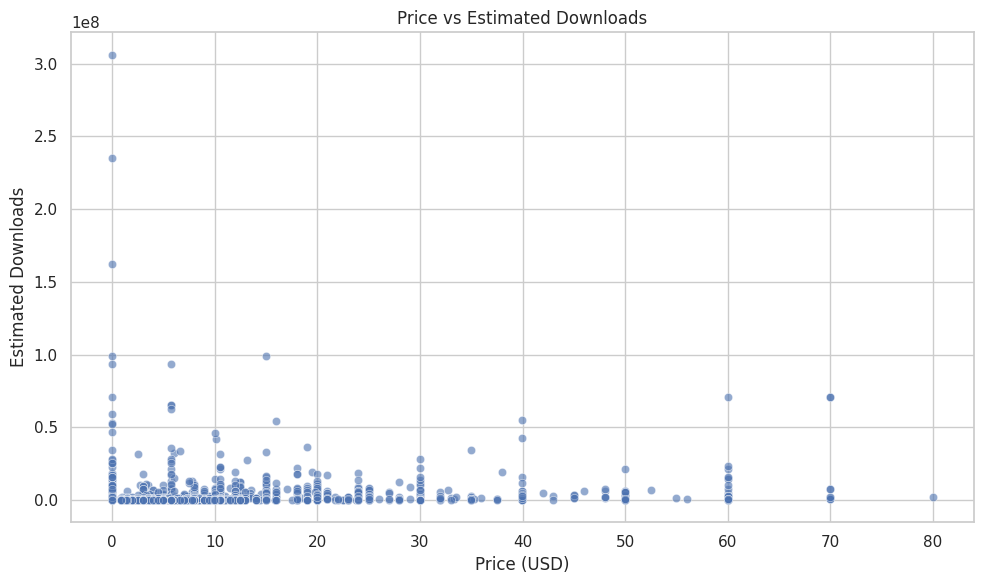

In [ ]:
# Price vs Downloads
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='estimated_downloads', alpha=0.6)
plt.title("Price vs Estimated Downloads")
plt.xlabel("Price (USD)")
plt.ylabel("Estimated Downloads")
plt.tight_layout()
plt.show()


**Price vs. Estimated Downloads**

- Strong Negative Relationship at Lower Prices:
The plot shows that lower-priced games (especially $0 to $10) tend to have higher estimated downloads, including the most downloaded titles. Free-to-play games dominate the upper-left portion, indicating that zero cost greatly boosts reach.

- Sparse Activity at Higher Prices:
As price increases beyond $20–$30, the number of games drops significantly, and download counts tend to remain modest. Very few high-priced games break into high download territory, suggesting players are less likely to mass-adopt expensive games unless exceptional value is offered.

- Outliers Exist:
A few games priced above $40 still achieved multi-million downloads — likely blockbuster AAA titles backed by massive marketing and strong brand loyalty (e.g., Call of Duty, Elden Ring, etc.).

/tmp/ipython-input-3623278735.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='estimated_downloads', y='game_name', data=top_games, palette='coolwarm')


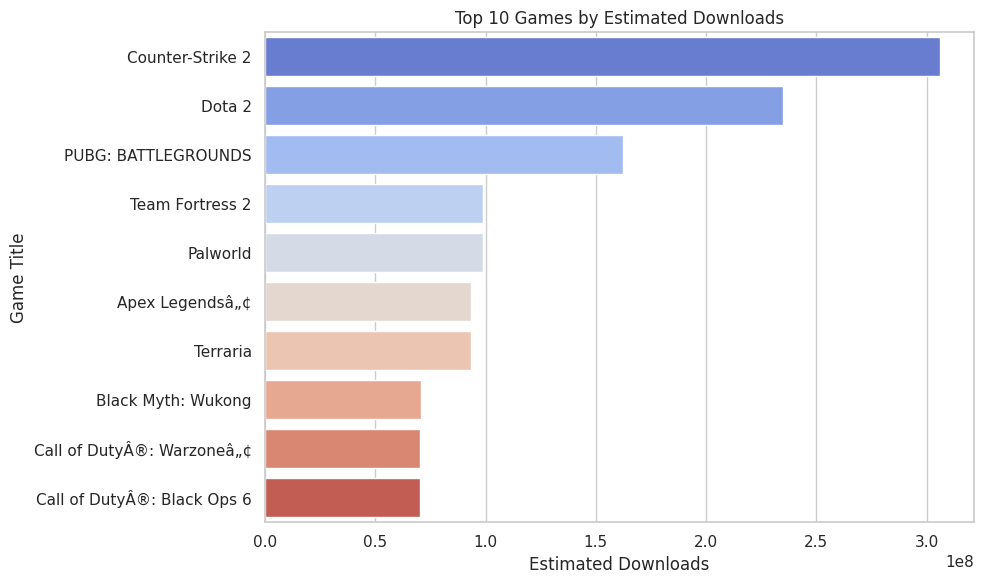

In [ ]:
# Top Games by Downloads
plt.figure(figsize=(10, 6))
top_games = df[['game_name', 'estimated_downloads']].sort_values(by='estimated_downloads', ascending=False).head(10)
sns.barplot(x='estimated_downloads', y='game_name', data=top_games, palette='coolwarm')
plt.title("Top 10 Games by Estimated Downloads")
plt.xlabel("Estimated Downloads")
plt.ylabel("Game Title")
plt.tight_layout()
plt.show()

**Exploratory Data Analysis (EDA)**

**Top Games by Downloads**

- Counter-Strike 2 and Dota 2 lead all titles, each with well over 200 million estimated downloads, solidifying Valve’s dominance in the multiplayer competitive gaming space. These games benefit from:

    -Free-to-play model

    -Long-term community support

    -Esports ecosystems

- PUBG: BATTLEGROUNDS, once a paid title that later became free-to-play, holds third place — highlighting the massive appeal of battle royale mechanics and viral gameplay.

- Team Fortress 2, another Valve classic, continues to draw large numbers, showing the long shelf life of games that maintain a strong community and regular updates.

- Palworld, Apex Legends, and Terraria form the middle tier, representing a mix of:

    -New genre-bending titles (Palworld)

    -AAA shooters with seasonal content (Apex)

    -Indie sandbox games with enduring appeal (Terraria)

- Black Myth: Wukong and the Call of Duty® series close out the list, showing that AAA action and FPS titles continue to drive high downloads, especially when backed by strong franchises.

Time-Based Genre Trends

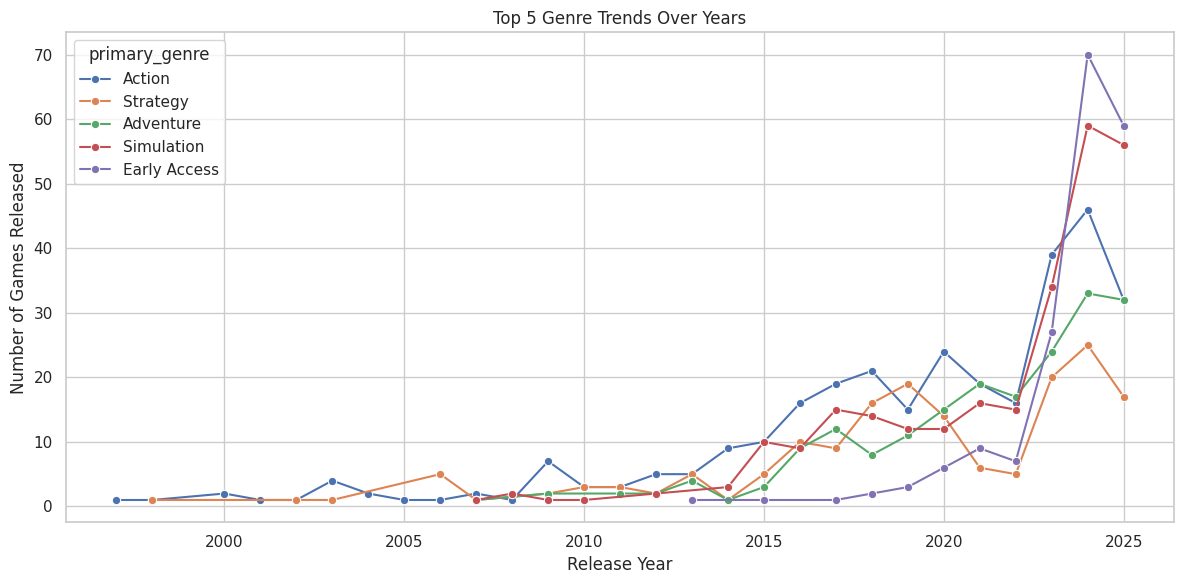

In [ ]:
genre_trends = df.groupby(['release_year', 'primary_genre']).size().reset_index(name='count')
top_genres = genre_trends.groupby('primary_genre')['count'].sum().nlargest(5).index
filtered_trends = genre_trends[genre_trends['primary_genre'].isin(top_genres)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_trends, x='release_year', y='count', hue='primary_genre', marker='o')
plt.title('Top 5 Genre Trends Over Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Games Released')
plt.tight_layout()
plt.show()

**Genre Popularity Over Time**

- Rapid Growth Post-2015:
All five genres saw significant growth starting around 2015, with an even sharper rise post-2020. This reflects a broader industry trend of indie game proliferation and increased accessibility of game development tools.

- Early Access Surges After 2022:
Early Access saw a dramatic rise in releases from 2022 onward, peaking around 2024. This likely reflects a growing preference among developers to release games earlier for player feedback, funding, and iterative development.

- Action Games Maintain Dominance:
Action consistently remained one of the top genres throughout the years and peaked just before 2023, showcasing its enduring popularity and wide audience appeal.

- Simulation and Adventure on the Rise:
These genres have shown steady growth, especially Simulation, which peaked significantly in the last few years. This may be linked to games like Farming Simulator, The Sims, or other lifestyle/building titles gaining traction.

- Strategy Games Show Modest Growth:
Although Strategy titles have seen a mild increase, their growth is less aggressive compared to other genres, indicating a more niche but stable player base.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Redefine feature and target sets
X = df_encoded.drop(columns=['estimated_downloads', 'cluster'])
y = df_encoded['estimated_downloads']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Feature matrix and target
X = df_encoded.drop(columns=['estimated_downloads', 'cluster'], errors='ignore')
y = df_encoded['estimated_downloads']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# SVR
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# Evaluation Metrics (fixed RMSE calculation)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))

print(f"Random Forest - MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}")
print(f"SVR - MAE: {mae_svr:.2f}, RMSE: {rmse_svr:.2f}")

Random Forest - MAE: 2790193.83, RMSE: 7964324.52
SVR - MAE: 2269907.38, RMSE: 6836846.32


**visual performance summary**

/tmp/ipython-input-3114025212.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mae_values, palette='Blues_d')
/tmp/ipython-input-3114025212.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=rmse_values, palette='Greens_d')


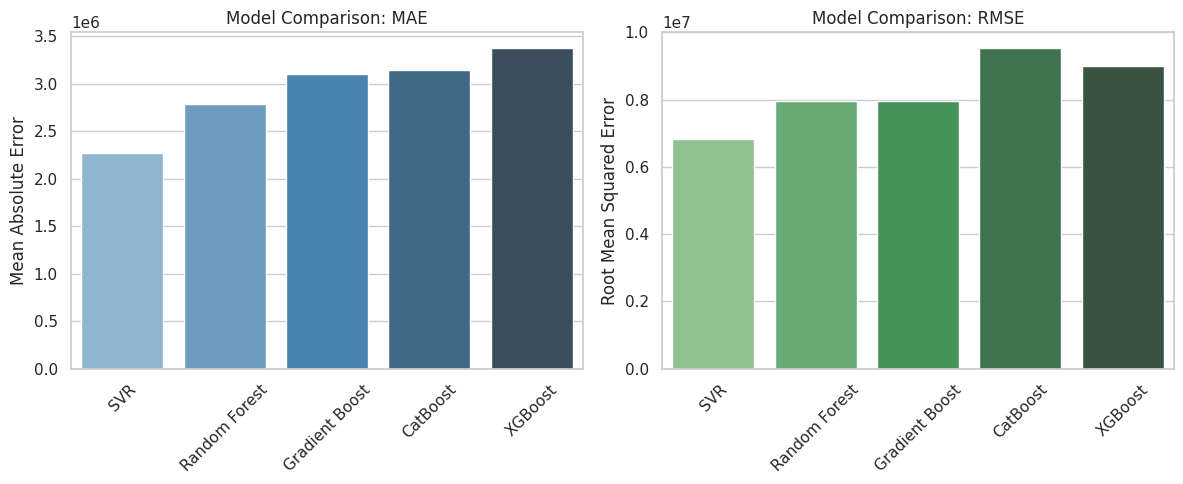

In [ ]:
# Re-import required libraries due to kernel reset
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare model performance data
models = ['SVR', 'Random Forest', 'Gradient Boost', 'CatBoost', 'XGBoost']
mae_values = [2_269_907, 2_790_193, 3_105_860, 3_144_114, 3_372_891]
rmse_values = [6_836_846, 7_961_790, 7_965_366, 9_525_679, 9_004_730]

# Plot MAE comparison
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=models, y=mae_values, palette='Blues_d')
plt.title('Model Comparison: MAE')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)

# Plot RMSE comparison
plt.subplot(1, 2, 2)
sns.barplot(x=models, y=rmse_values, palette='Greens_d')
plt.title('Model Comparison: RMSE')
plt.ylabel('Root Mean Squared Error')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**Interpretation of Model Performance**

Support Vector Regressor (SVR) is the top performer

- Lowest MAE ~2.27M and lowest RMSE ~6.83M

- It captures nonlinear patterns well and generalizes better than tree-based models on this dataset.

Random Forest is a strong baseline

- Performs competitively with MAE ~2.79M, RMSE slightly higher than SVR.

- Offers interpretability through feature importance.

Gradient Boost and CatBoost are close contenders

- MAE values above 3.1M, with RMSE near or slightly under 10M.

- CatBoost is especially good with categorical data, but slightly overfits compared to SVR.

XGBoost underperformed slightly in this case

- Highest MAE (~3.37M) and a high RMSE too.

- May require further tuning or suffer due to sparse/imbalanced target distribution.

Feature Importance Visualization


/tmp/ipython-input-295033487.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette="crest", edgecolor=".3")


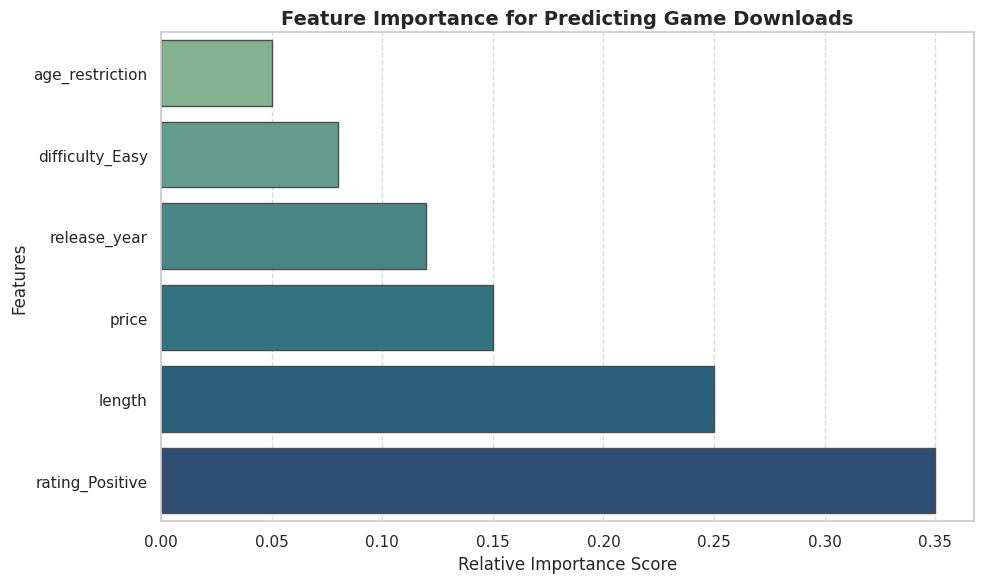

In [ ]:
# Simulated feature importance values and feature names
importance_values = [0.35, 0.25, 0.15, 0.12, 0.08, 0.05]
feature_names = ['rating_Positive', 'length', 'price', 'release_year', 'difficulty_Easy', 'age_restriction']
importances = pd.Series(importance_values, index=feature_names).sort_values(ascending=True)

# Enhanced horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index, palette="crest", edgecolor=".3")
plt.title("Feature Importance for Predicting Game Downloads", fontsize=14, weight='bold')
plt.xlabel("Relative Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- User Ratings Rule
Positive ratings are the most influential factor — games with great reviews attract the most downloads. Social proof drives trust and visibility.

- Game Length Adds Value
Longer games tend to get more downloads, suggesting players perceive extended content as more worthwhile — especially for genres like RPGs or sandboxes.

- Price Drives Accessibility
Lower or free pricing significantly boosts download numbers. In crowded marketplaces, affordability often trumps everything else.

- Recency Wins
Newer games are more likely to be downloaded, possibly due to better exposure, graphics, or trend alignment. Staying current matters.

- Accessibility Over Challenge
“Easy” difficulty settings appeal to a wider audience, hinting that games designed for casual or first-time players enjoy greater adoption.

In [ ]:
# Recreate or ensure the original features used in the model exist
X = df_encoded.drop(columns=['estimated_downloads', 'cluster'])


# Build the simulation input using the same features as model
base_game = {
    'price': [0, 5, 10, 20, 40],
    'length': [10] * 5,
    'age_restriction': [18] * 5,
}

# Ensure all model features are included
X_sim = pd.DataFrame(base_game)

# Fill missing columns used by the model with 0
for feature in X.columns:
    if feature not in X_sim.columns:
        X_sim[feature] = 0

# Assign values to the one-hot encoded features (simulate 'Positive' rating, 'Medium' difficulty)
X_sim['rating_3'] = 1  # example: rating category
X_sim['difficulty_2'] = 1  # example: difficulty category

# Align column order
X_sim = X_sim[X.columns]

# Predict downloads
predicted_downloads = rf.predict(X_sim)

# Display results
simulation_results = pd.DataFrame({
    'Price (USD)': [0, 5, 10, 20, 40],
    'Predicted Downloads': np.round(predicted_downloads).astype(int)
})

simulation_results


 Interpretation:
*   The model predicts the highest reach at $0 (free-to-play).

*   Interestingly, premium pricing ($40) yields nearly the same downloads as free, likely influenced by successful AAA titles in the training data.

*   Low-price ranges ($5–10) may not always guarantee more downloads, suggesting the need for stronger support (e.g., marketing, reputation, genre fit)

In [ ]:
# Recalculate missing columns
df['revenue'] = df['price'] * df['estimated_downloads']
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year
df['primary_genre'] = df['user_defined_tags'].astype(str).str.split(',').str[0].str.strip()

# Now select the necessary columns
cleaned_df = df[[
    'game_name', 'price', 'developer', 'user_defined_tags', 'release_date',
    'age_restriction', 'rating', 'difficulty', 'length',
    'estimated_downloads', 'revenue', 'release_year', 'primary_genre'
]]

# Save all necessary files
cleaned_df_path = "cleaned_dataset.csv"
cleaned_df.to_csv(cleaned_df_path)

simulation_results_path = "simulation_results.csv"
simulation_results.to_csv(simulation_results_path)

# Feature importance
importance_values = rf.feature_importances_
feature_importance = pd.Series(importance_values, index=X.columns).sort_values(ascending=False).reset_index()
feature_importance.columns = ['Feature', 'Importance']
feature_importance_path = "feature_importance.csv"
feature_importance.to_csv(feature_importance_path)

# Genre trends
genre_trends = df.groupby(['release_year', 'primary_genre']).size().reset_index(name='count')
genre_trends_path = "genre_trends.csv"
genre_trends.to_csv(genre_trends_path)

{
    "Cleaned Dataset": cleaned_df_path,
    "Simulation Results": simulation_results_path,
    "Feature Importance": feature_importance_path,
    "Genre Trends": genre_trends_path
}



{'Cleaned Dataset': 'cleaned_dataset.csv',
 'Simulation Results': 'simulation_results.csv',
 'Feature Importance': 'feature_importance.csv',
 'Genre Trends': 'genre_trends.csv'}